# Logistic Regression with Titanic Dataset

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector

## Load Dataset

In [2]:
plt.style.use('ggplot') # check for more with plt.style.available
df = load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🔎 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()/len(df)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [5]:
df.drop(columns=['deck','embarked','embark_town','class','alive'], inplace=True)

In [6]:
df.shape

(891, 10)

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,man,True,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,537,537,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


## Set Target and Features

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,man,True,False
1,1,1,female,38.0,1,0,71.2833,woman,False,False
2,1,3,female,26.0,0,0,7.9250,woman,False,True
3,1,1,female,35.0,1,0,53.1000,woman,False,False
4,0,3,male,35.0,0,0,8.0500,man,True,True


In [10]:
X = df.drop('survived',axis=1)
y = df.survived

## Train Test Split

In [11]:
test_size = 0.1
random_state = 10

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((801, 9), (90, 9), (801,), (90,))

# Pipeline

In [13]:
# Define numerical columns and categorical columns
num_col = make_column_selector(dtype_include=['float64','int64'])
cat_col = make_column_selector(dtype_include=['object', 'bool'])

# Define transformer for numerical and categorical columns
num_transformer = make_pipeline(SimpleImputer(),StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'))

# preprocessor
preprocessor = make_column_transformer((num_transformer,num_col),(cat_transformer,cat_col))

# Add estimator
pipeline = make_pipeline(preprocessor, LogisticRegression())
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x290ce5540>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x290ce6e30>)])),
                ('logisticregression', LogisticRegression())])

In [14]:
X_train_transformed = preprocessor.fit_transform(X_train)

print("Original training set")
display(X_train.head(3))

print("Preprocessed training set")
display(pd.DataFrame(X_train_transformed).head(3))

Original training set


,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
429,3,male,32.0,0,0,8.0500,man,True,True
629,3,male,NaN,0,0,7.7333,man,True,True
351,1,male,NaN,0,0,35.0000,man,True,True


Preprocessed training set


,0,1,2,3,4,5,6,7,8,9,10
0,0.825094,0.165171,-0.462447,-0.474189,-0.485107,1.0,0.0,1.0,0.0,1.0,1.0
1,0.825094,0.000000,-0.462447,-0.474189,-0.491421,1.0,0.0,1.0,0.0,1.0,1.0
2,-1.560827,0.000000,-0.462447,-0.474189,0.052248,1.0,0.0,1.0,0.0,1.0,1.0


In [15]:
# Get features' names
preprocessor.get_feature_names_out()

array(['pipeline-1__pclass', 'pipeline-1__age', 'pipeline-1__sibsp',
       'pipeline-1__parch', 'pipeline-1__fare', 'pipeline-2__sex_male',
       'pipeline-2__who_child', 'pipeline-2__who_man',
       'pipeline-2__who_woman', 'pipeline-2__adult_male_True',
       'pipeline-2__alone_True'], dtype=object)

In [16]:
pd.DataFrame(
    data=X_train_transformed, 
    columns=preprocessor.get_feature_names_out()
).head()

,pipeline-1__pclass,pipeline-1__age,pipeline-1__sibsp,pipeline-1__parch,pipeline-1__fare,pipeline-2__sex_male,pipeline-2__who_child,pipeline-2__who_man,pipeline-2__who_woman,pipeline-2__adult_male_True,pipeline-2__alone_True
0,0.825094,0.165171,-0.462447,-0.474189,-0.485107,1.0,0.0,1.0,0.0,1.0,1.0
1,0.825094,0.000000,-0.462447,-0.474189,-0.491421,1.0,0.0,1.0,0.0,1.0,1.0
2,-1.560827,0.000000,-0.462447,-0.474189,0.052248,1.0,0.0,1.0,0.0,1.0,1.0
3,0.825094,0.000000,-0.462447,-0.474189,-0.485107,1.0,0.0,1.0,0.0,1.0,1.0
4,-1.560827,0.705420,0.438819,-0.474189,0.468972,0.0,0.0,0.0,1.0,0.0,0.0


# Training and Evaluation

In [17]:
# Train Pipeline
pipeline.fit(X_train,y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Score model
score = accuracy_score(y_test, y_pred)
print(f'🎯Accuracy score is {round(score, 2)}')

🎯Accuracy score is 0.83


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        61
           1       0.75      0.72      0.74        29

    accuracy                           0.83        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.83      0.83      0.83        90



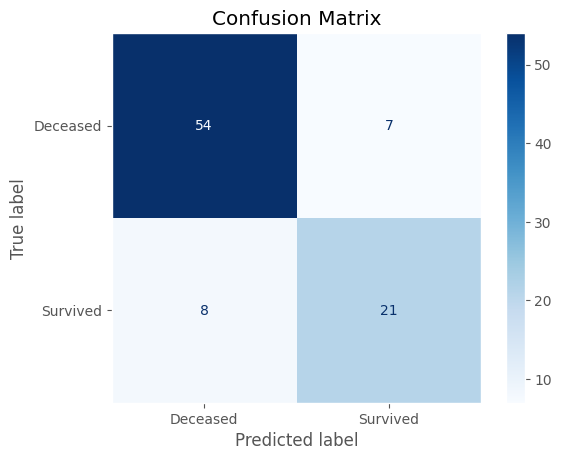

In [19]:
# Instantiate Confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Instantiate ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Deceased','Survived'])

display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()
